<a href="https://colab.research.google.com/github/Brigitalia/Customer_Curn/blob/main/Customer_curn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import platform
import pandas as pd
import sklearn
import numpy as np
#import graphviz
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ADS/Telco-Customer-Churn.csv')
data.shape

(7043, 21)

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,F,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66.0,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
data.size

147903

In [ ]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.isnull().sum()

customerID          0
gender              5
SeniorCitizen       0
Partner             0
Dependents          0
tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['tenure'].fillna(data['tenure'].mean(), inplace=True)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.duplicated().sum()

0

Data Cleaning

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
# Dapatkan daftar semua kolom bertipe object
daftar_kolom = data.select_dtypes(include=['object']).columns.tolist()

# Kolom yang ingin dikecualikan
excluded_columns = ['customerID', 'TotalCharges']

# Menggunakan set difference untuk mendapatkan kolom yang akan diproses
kolom_proses = list(set(daftar_kolom) - set(excluded_columns))

# Menggunakan LabelEncoder untuk mengubah nilai pada kolom yang telah dipilih
le = LabelEncoder()
for kolom in kolom_proses:
    data[kolom] = le.fit_transform(data[kolom])

# Mengubah kolom 'TotalCharges' menjadi tipe data numerik
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


##ngubah type data

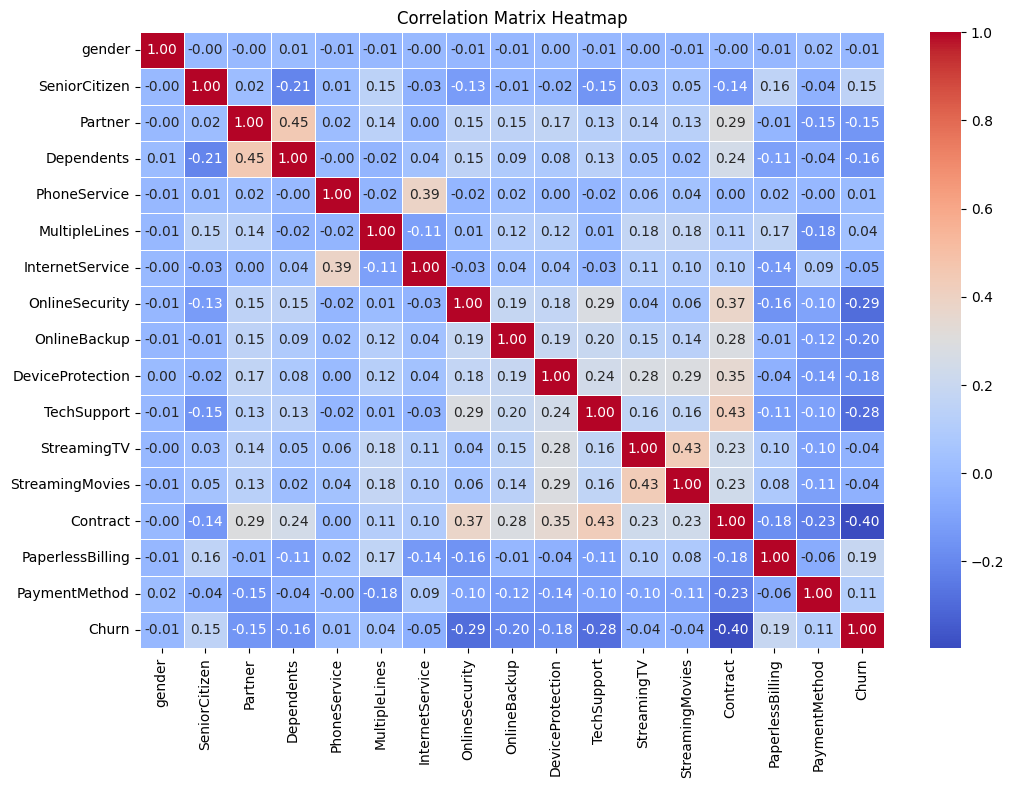

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter kolom-kolom bertipe data integer
integer_columns = data.select_dtypes(include=['int']).columns #tidak perlu int

# Hitung matriks korelasi
correlation_matrix =data[integer_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title("Correlation Matrix Heatmap")
plt.show()

•  Variabel gender dan Senior Citizen memiliki korelasi negatif yang lemah (sekitar -0.07). Hal ini menunjukkan bahwa ada sedikit kecenderungan bagi lansia untuk menjadi perempuan.
•  Variabel Partner dan Dependents memiliki korelasi positif yang sedang (sekitar 0.45). Hal ini menunjukkan bahwa ada hubungan yang cukup kuat antara memiliki pasangan dan memiliki tanggungan.
•  Variabel PhoneService dan InternetService memiliki korelasi positif yang kuat (sekitar 0.7). Hal ini menunjukkan bahwa ada hubungan yang sangat kuat antara memiliki layanan telepon dan memiliki layanan internet.
•  Variabel OnlineSecurity dan OnlineBackup memiliki korelasi positif yang kuat (sekitar 0.8). Hal ini menunjukkan bahwa ada hubungan yang sangat kuat antara memiliki keamanan internet dan memiliki backup online.
•  Variabel DeviceProtection dan TechSupport memiliki korelasi positif yang kuat (sekitar 0.7). Hal ini menunjukkan bahwa ada hubungan yang sangat kuat antara memiliki perlindungan perangkat dan memiliki dukungan teknis.


In [ ]:
categorical_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod",
]
numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
target = "Churn"

In [ ]:
data.skew(numeric_only= True)

gender              -0.021018
SeniorCitizen        1.833633
Partner              0.067922
Dependents           0.875199
tenure              46.492908
PhoneService        -2.727153
MultipleLines        0.118719
InternetService      0.205423
OnlineSecurity       0.416985
OnlineBackup         0.182930
DeviceProtection     0.186847
TechSupport          0.402365
StreamingTV          0.028486
StreamingMovies      0.014657
Contract             0.630959
PaperlessBilling    -0.375396
PaymentMethod       -0.170129
MonthlyCharges      -0.220524
TotalCharges         0.961642
Churn                1.063031
dtype: float64

# Fitur Distribusi

plot distribusi untuk fitur numerik dan kategorikal untuk memeriksa pencilan dan membandingkan distribusi fitur dengan variabel target.

In [ ]:
data[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,35.043892,64.761692,2283.300441
std,115.258312,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,7100.000000,118.750000,8684.800000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

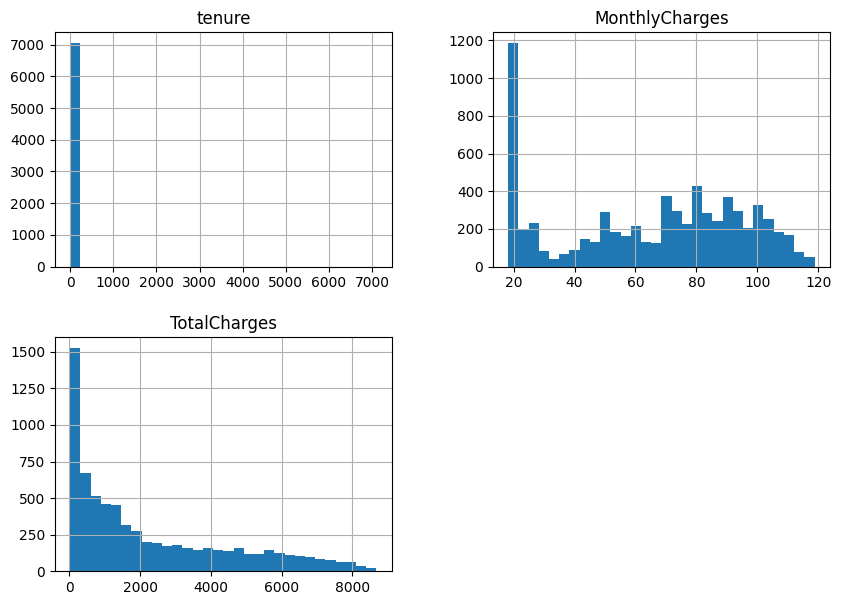

In [ ]:
data[numerical_features].hist(bins=30, figsize=(10, 7))

In [ ]:
# Menghitung jumlah "Yes" dan "No" pada kolom "Churn"
yes_count = data[data['Churn'] == 1].shape[0]
no_count = data[data['Churn'] == 0].shape[0]

# Menampilkan hasil
print("Jumlah pelanggan yang churn (Yes):", yes_count)
print("Jumlah pelanggan yang tidak churn (No):", no_count)

Jumlah pelanggan yang churn (Yes): 1869
Jumlah pelanggan yang tidak churn (No): 5174


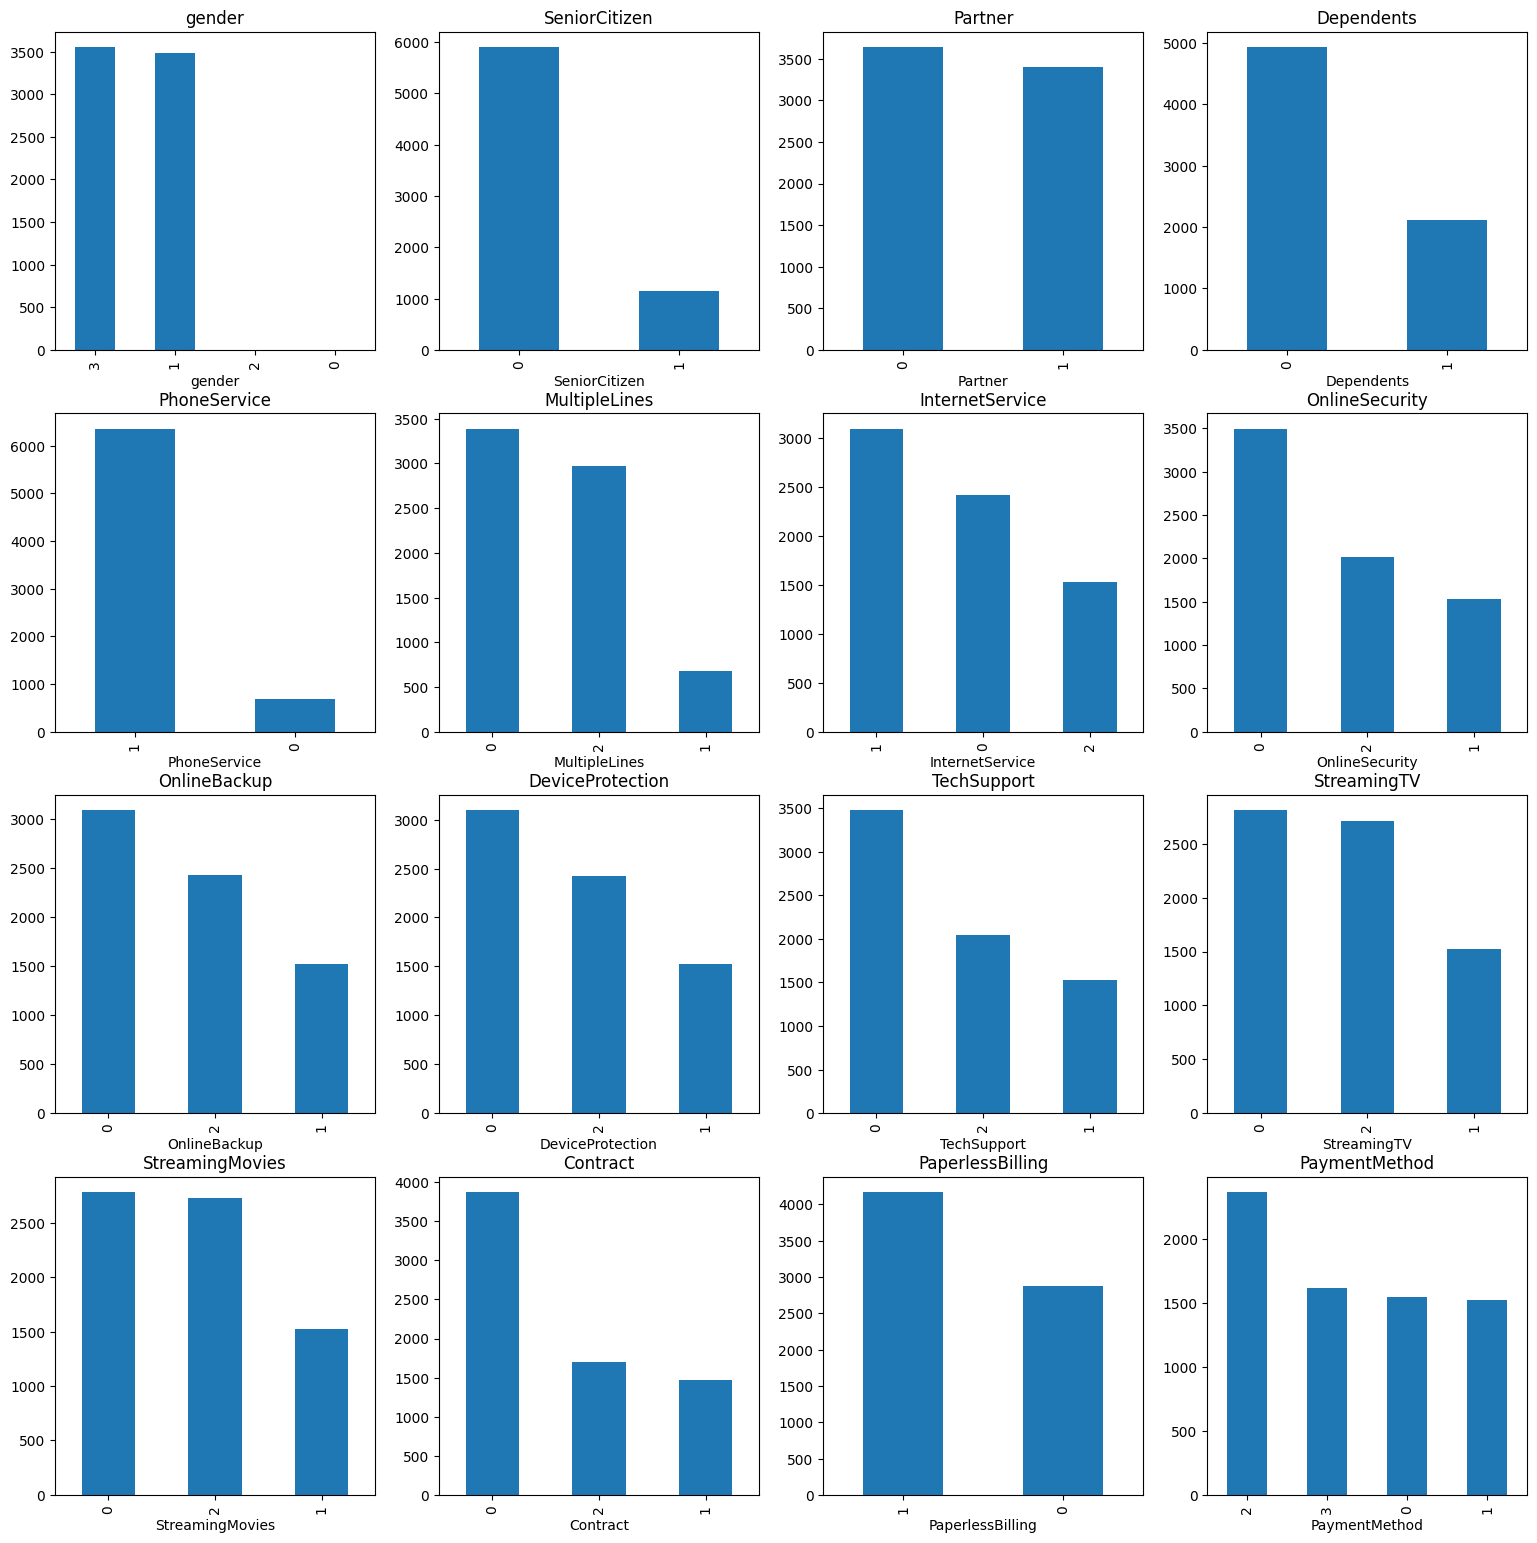

In [ ]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS,COLS, figsize=(19,19))
row, col = 0, 0,
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    data[categorical_feature].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_feature)

Text(0.5, 1.0, 'churned')

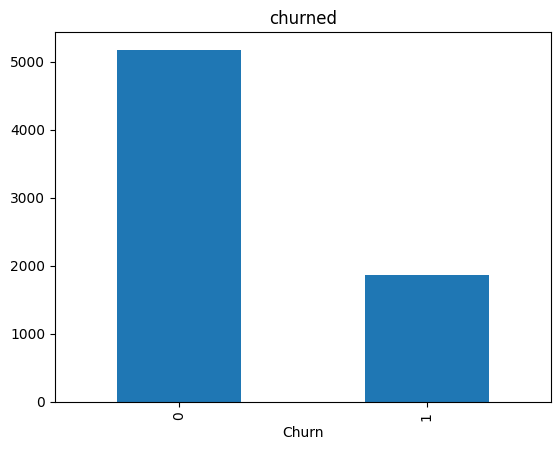

In [ ]:
data[target].value_counts().plot(kind='bar').set_title('churned')

# outlier

In [ ]:
x = ['tenure','MonthlyCharges','TotalCharges']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(data,i)

There are outliers in tenure
Count of outliers are: 5
No outliers in MonthlyCharges
No outliers in TotalCharges


In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))

# Menghilangkan outlier
data_no_outliers = data[(z_scores < 3).all(axis=1)]

In [ ]:
print(data_no_outliers)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [ ]:
# Identify the column to check for outliers
column_name = 'tenure'

# Define the IQR (Interquartile Range) threshold
IQR = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
lower_bound = data[column_name].quantile(0.25) - 1.5 * IQR
upper_bound = data[column_name].quantile(0.75) + 1.5 * IQR

# Filter out outliers
filtered_data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

# Print the filtered data
print(filtered_data)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0     1.0   
1     5575-GNVDE       3              0        0           0    34.0   
2     3668-QPYBK       3              0        0           0     2.0   
3     7795-CFOCW       3              0        0           0    45.0   
4     9237-HQITU       1              0        0           0     2.0   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       3              0        1           1    24.0   
7039  2234-XADUH       1              0        1           1    72.0   
7040  4801-JZAZL       1              0        1           1    11.0   
7041  8361-LTMKD       3              1        1           0     4.0   
7042  3186-AJIEK       3              0        0           0    66.0   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0          

# Memilih atribut

In [ ]:
data.drop(['customerID'],axis = 1,inplace = True)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3,0,0,0,34.0,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3,0,0,0,2.0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,3,0,0,0,45.0,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,1,0,0,0,2.0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Dropped customerID because it is not needed

# Feature Selection

# Decision Tree

Prediksi dengan Decision Tree

In [ ]:
selected_features = ['SeniorCitizen', 'PaymentMethod', 'PhoneService', 'MultipleLines', 'PaperlessBilling','tenure','MonthlyCharges']
X = data[selected_features]
y = data['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[936 100]
 [189 184]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.79      1409

Accuracy: 0.794889992902768


[Text(0.48660714285714285, 0.9166666666666666, 'tenure <= 16.5\ngini = 0.39\nsamples = 5634\nvalue = [4138, 1496]'),
 Text(0.2544642857142857, 0.75, 'MonthlyCharges <= 68.625\ngini = 0.496\nsamples = 2024\nvalue = [1106, 918]'),
 Text(0.14285714285714285, 0.5833333333333334, 'tenure <= 3.5\ngini = 0.415\nsamples = 1113\nvalue = [786, 327]'),
 Text(0.07142857142857142, 0.4166666666666667, 'MonthlyCharges <= 20.875\ngini = 0.492\nsamples = 484\nvalue = [272, 212]'),
 Text(0.03571428571428571, 0.25, 'tenure <= 1.5\ngini = 0.399\nsamples = 178\nvalue = [129, 49]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.45\nsamples = 117\nvalue = [77, 40]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.252\nsamples = 61\nvalue = [52, 9]'),
 Text(0.10714285714285714, 0.25, 'SeniorCitizen <= 0.5\ngini = 0.498\nsamples = 306\nvalue = [143, 163]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.5\nsamples = 267\nvalue = [133, 134]'),
 Text(0.125, 0.08333333333333333,

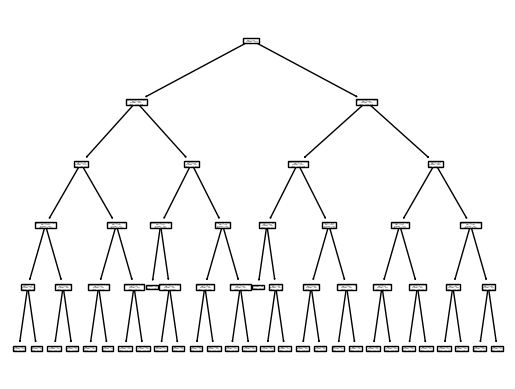

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features=None,
    random_state=42
)

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

# Evaluasi performa model
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))

tree.plot_tree(dtc, feature_names= selected_features)


In [ ]:
y_pred_dt = model.predict(X_test)

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

#Membuat heatmap confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Class')

plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Definisikan model Logistic Regression dengan parameter tertentu
logreg = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    max_iter=100,
    random_state=42
)

# Melatih model
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Evaluasi model
print(classification_report(y_test, y_pred_logreg))
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy: {accuracy_logreg:.2f}')

# Tetapkan nilai toleransi
target_accuracy = 0.70

# Periksa apakah hasil memenuhi toleransi
if accuracy_logreg >= target_accuracy:
    print("Logistic Regression Accuracy memenuhi toleransi.")
else:
    print("Logistic Regression Accuracy tidak memenuhi toleransi.")

NameError: name 'X_train' is not defined

In [ ]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)

#Membuat heatmap confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])

plt.xlabel('Predicted Label')
plt.ylabel('Actual Class')

plt.title('Confusion Matrix')
plt.show()